In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils import savefig

In [2]:
import pathlib as pl
import candas as can

code_pth = pl.Path.cwd()  # for running in Jupyter
# code_pth = pl.Path(__file__)  # for running in terminal
fig_pth = code_pth.parent
data_pth = fig_pth / "data"
graph_pth = fig_pth / "graphics"
graph_pth.mkdir(exist_ok=True)

gen_pth = fig_pth / "generated"
gen_pth.mkdir(exist_ok=True)

plt.style.use(str(can.style.breve))

In [3]:
xval_avg = pd.read_csv(gen_pth / "Avg_model_xval.csv")
xval_ind = pd.read_csv(gen_pth / "Ind_model_xval.csv")
xval_lmc_pr = pd.read_csv(gen_pth / "LMC_model_xval.csv")
xval = pd.concat([xval_avg.assign(
    model="Average",
), xval_ind.assign(
    model="Individual",
), xval_lmc_pr.assign(
    model="LMC_pr",
)], axis=0)

if (gen_pth / "LMC_model2_xval.csv").exists():
    xval_lmc_p = pd.read_csv(gen_pth / "LMC_model2_xval.csv")
    xval = pd.concat([xval, xval_lmc_p.assign(
        model="LMC_p",
    )], axis=0)
    
xval = xval.rename(columns={
    "N_train": "N Training Points",
    'Train_RMSE': 'Training-set RMSE',
    'Test_RMSE': 'Test-set RMSE',
    'Train_NLPD': 'Training-set NLPD',
    'Test_NLPD': 'Test-set NLPD',
}).reset_index(drop=True)

Saving fig_S7__high_gecko in /home/john/projects/can-manuscript/fig_S7_high_gecko/graphics: [.svg] [.png] done


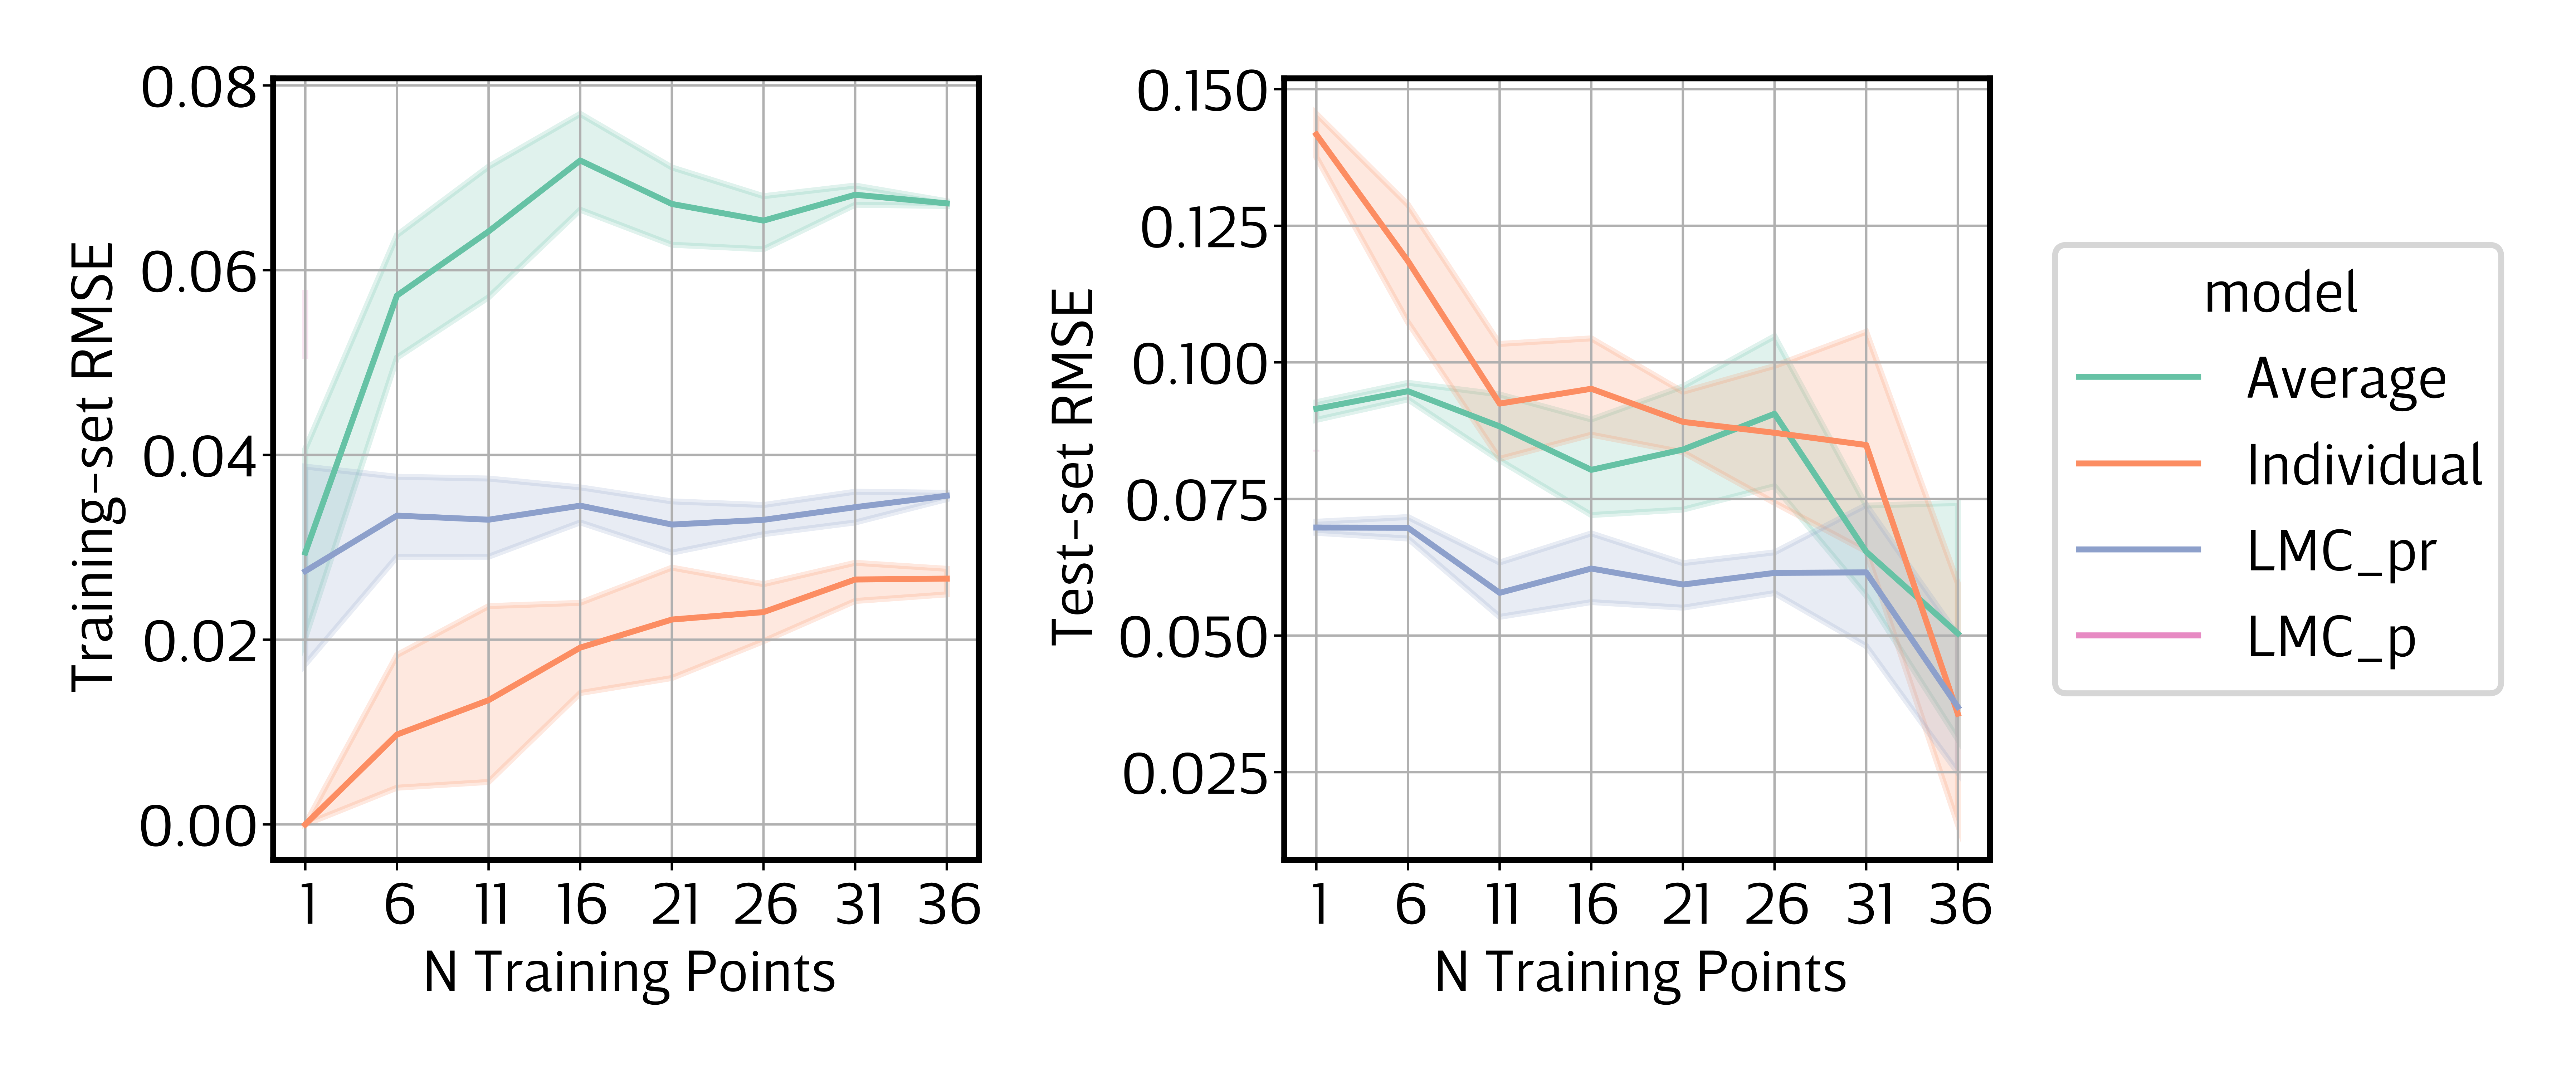

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
for ax, y in zip(axes.flatten(), ["Training-set RMSE", "Test-set RMSE"]):
    
    sns.lineplot(
        ax=ax,
        data=xval,
        x="N Training Points",
        y=y,
        hue="model",
        errorbar="ci",
        palette="Set2",
    )
    # ax.set_title(f"{y} vs N Training Points")
    ax.grid(True)
    ax.set_xticks(xval["N Training Points"].unique())
    
    if ax == axes.flatten()[-1]:
        sns.move_legend(ax, "center left", bbox_to_anchor=(1.05, 0.5))
    else:
        ax.legend().remove()

plt.tight_layout()

savefig(plt.gcf(), alias='high_gecko')

In [5]:
models = xval["model"].unique()
n_m = len(models)
fig, axes = plt.subplots(1, n_m, figsize=(5*n_m, 5), sharex=True, sharey=True)

for ax, model in zip(axes.flat, models):
    data = xval[(xval["model"] == model) & (xval["N Training Points"] > 1)]
    
    sns.scatterplot(
        ax=ax,
        data=data,
        x="Training-set RMSE",
        y="Test-set RMSE",
        hue="N Training Points",
        legend=True,
    )
    sns.kdeplot(
        ax=ax,
        data=data,
        x="Training-set RMSE",
        y="Test-set RMSE",
        levels=1,
        hue="N Training Points",
        legend=True,
    )
    ax.set_title(f"Model: {model}")
    ax.grid(True)

    if ax == axes.flatten()[-1]:
        sns.move_legend(ax, "center left", bbox_to_anchor=(1.05, 0.5))
    else:
        ax.legend().remove()


plt.tight_layout()
savefig(plt.gcf(), alias="high_gecko")

ValueError: Axes(0.731522,0.11;0.168478x0.77) has no legend attached.